In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [20]:
df=pd.read_excel('http://taanila.fi/Concrete_Data.xlsx')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [40]:
df['age2'] = np.log(df['Age (day)'])
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",age2
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,3.332205
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,3.332205
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,5.598422
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,5.899897
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,5.886104


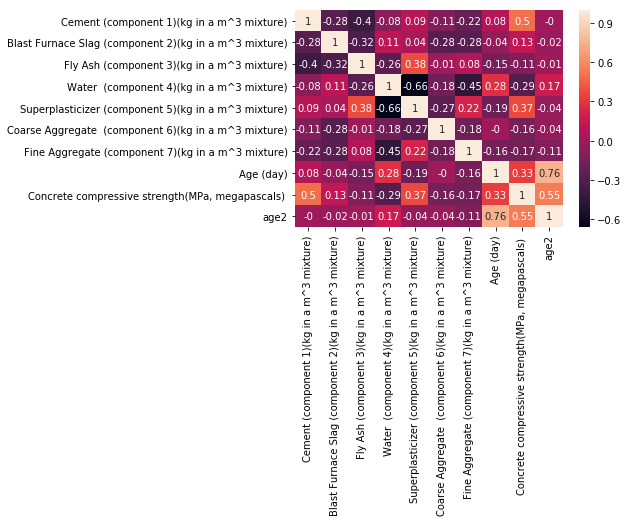

In [43]:
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

In [44]:
X = df[['Cement (component 1)(kg in a m^3 mixture)', 'age2']]
y = df['Concrete compressive strength(MPa, megapascals) ']

In [45]:
from sklearn.linear_model import LinearRegression

malli = LinearRegression().fit(X,y)

In [46]:
malli.coef_

array([0.07972877, 7.75415215])

In [47]:
malli.intercept_

-11.143572459065403

In [48]:
malli.score(X,y)

0.5536749170756792

Text(0, 0.5, 'Poikkeama todellisesta')

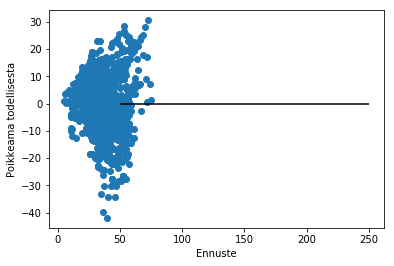

In [49]:
# Mallin virhetermit pistekaaviona
plt.scatter(malli.predict(X), malli.predict(X)-y)

# Vaakaviiva nollapoikkeaman kohdalle
plt.hlines(y=0,xmin=50,xmax=250)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Text(0, 0.5, 'Ennuste')

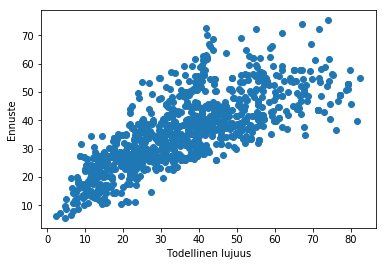

In [52]:
plt.scatter(y, malli.predict(X))

plt.xlabel('Todellinen lujuus')
plt.ylabel('Ennuste')